In [13]:
# Calculate the trace of the matrix
def calculate_trace(matrix, size):
    trace_sum = 0
    for i in range(size):
        trace_sum += matrix[i][i]
    return trace_sum

# Calculate the sum of minors along the diagonal
def calculate_minor_sum(matrix, size):
    return ((matrix[2][2] * matrix[1][1] - matrix[2][1] * matrix[1][2])
            + (matrix[2][2] * matrix[0][0] - matrix[2][0] * matrix[0][2])
            + (matrix[1][1] * matrix[0][0] - matrix[1][0] * matrix[0][1]))

# Get the cofactor of the matrix element at row p and column q
def get_cofactor(matrix, temp, p, q, size):
    i, j = 0, 0

    # Looping for each element of the matrix
    for row in range(size):
        for col in range(size):

            # Copying into temporary matrix only those
            # element which are not in given row and
            # column
            if (row != p and col != q):
                temp[i][j] = matrix[row][col]
                j += 1

                # Row is filled, so increase row index
                # and reset col index
                if (j == size - 1):
                    j = 0
                    i += 1

# Calculate the determinant of the matrix
def calculate_determinant(matrix, size):

    # Initialize result
    determinant = 0

    # Base case: if matrix contains single element
    if (size == 1):
        return matrix[0][0]

    # To store cofactors
    temp = [[0 for i in range(size)] for j in range(size)]

    # To store sign multiplier
    sign = 1

    # Iterate for each element of first row
    for f in range(size):

        # Getting Cofactor of matrix[0][f]
        get_cofactor(matrix, temp, 0, f, size)
        determinant += sign * matrix[0][f] * calculate_determinant(temp, size - 1)

        # Terms are to be added with alternate sign
        sign = -sign

    return determinant

# Given matrix
matrix = [[121, 43, 51], [43, 60, 59], [51, 59, 95]]
trace = calculate_trace(matrix, 3)
minor_sum = calculate_minor_sum(matrix, 3)
determinant = calculate_determinant(matrix, 3)

# Print the characteristic equation
print("Characteristic equation:")
print(f"x^3 - {trace}x^2 + {minor_sum}x - {determinant}")


Characteristic equation:
x^3 - 276x^2 + 16524x - 195558


In [52]:
import numpy as np

# Generate random integer matrix C of size 4x3
C = np.random.randint(0, 10, size=(4, 3))

# Calculate A1 = C^T * C
A1 = np.dot(C.T, C)

# Compute characteristic equation
characteristic_eq = np.poly(A1)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A1)

# Print matrices and results
print("Matrix C:", C)
print("\nMatrix A1:", A1)
print("\nCharacteristic equation:", np.poly1d(characteristic_eq))
print("\nEigenvalues:", np.round(eigenvalues, 5))
print("\nEigenvectors:", np.round(eigenvectors, 5))

Matrix C: [[2 5 3]
 [9 3 1]
 [6 1 6]
 [0 5 7]]

Matrix A1: [[121  43  51]
 [ 43  60  59]
 [ 51  59  95]]

Characteristic equation:    3       2
1 x - 276 x + 1.652e+04 x - 1.956e+05

Eigenvalues: [197.25696  63.00898  15.73406]

Eigenvectors: [[ 0.65811  0.75077  0.0569 ]
 [ 0.46179 -0.3428  -0.81807]
 [ 0.59467 -0.56465  0.5723 ]]


In [24]:
def power_method1(A, max_iterations):
    # Define the initial vector
    x = np.ones((3, 1), dtype=np.float64)

    # Perform iterations of the power method
    for i in range(max_iterations):
        # Multiply A by the current vector
        Ax = np.dot(A, x)
        
        # Find the largest element in the resulting vector
        max_element = np.max(np.abs(Ax))
        
        # Normalize the resulting vector
        x = Ax / max_element
        
        # Compute the eigenvalue estimate
        eigenvalue = max_element
        
        # Compute the corresponding eigenvector
        y = x

        norm = np.linalg.norm(y)
    
        # Calculate the unit vector
        eigen_vector = y / norm
        
        # Print the current iteration, eigenvalue estimate, and its corresponding eigenvector
        print("Iteration", i+1, "-", np.round(eigenvalue, 5))

    # Return the last eigenvalue estimate and its corresponding eigenvector
    return eigenvalue, eigen_vector

In [25]:
import numpy as np
A1 = np.array([[121,  43,  51],
 [ 43,  60,  59],
 [ 51,  59,  95]], dtype=np.float64)


In [22]:
lambda1, x1 = power_method1(A1, 10)

print("Unit vector of x1:", np.round(x1, 5))

A2 = A1 - x1 @ x1.T @ A1

print(A2)

lambda2, x2 = power_method1(A2, 10)

print("unit vector x2 =", np.round(x2, 5))

A3 = A1 - x1 @ x1.T @ A1 - x2 @ x2.T @ A1

lambda3, x3 = power_method1(A3, 10)

print("Unit vector x3 =", np.round(x3, 5))


Iteration 1 - 215.0
Iteration 2 - 202.02791
Iteration 3 - 198.71153
Iteration 4 - 197.71554
Iteration 5 - 197.40289
Iteration 6 - 197.30352
Iteration 7 - 197.27183
Iteration 8 - 197.26171
Iteration 9 - 197.25847
Iteration 10 - 197.25744
Unit vector of x1: [[0.65811]
 [0.46179]
 [0.59467]]
[[ 35.5662818  -16.948644   -26.19858823]
 [-16.94872164  17.9341196    4.82985764]
 [-26.19869922   4.82984992  25.24264052]]
Iteration 1 - 7.58095
Iteration 2 - 61.9546
Iteration 3 - 62.74121
Iteration 4 - 62.94183
Iteration 5 - 62.9922
Iteration 6 - 63.00479
Iteration 7 - 63.00794
Iteration 8 - 63.00872
Iteration 9 - 63.00892
Iteration 10 - 63.00897
unit vector x2 = [[-0.75077]
 [ 0.3428 ]
 [ 0.56465]]
Iteration 1 - 2.43097
Iteration 2 - 15.73406
Iteration 3 - 15.73406
Iteration 4 - 15.73406
Iteration 5 - 15.73406
Iteration 6 - 15.73406
Iteration 7 - 15.73406
Iteration 8 - 15.73406
Iteration 9 - 15.73406
Iteration 10 - 15.73406
Unit vector x3 = [[-0.0569 ]
 [ 0.81807]
 [-0.5723 ]]


In [11]:

B=A1-np.matmul(np.matmul(x1_u,x1_u.T),A1)
B

array([[ 35.5662818 , -16.948644  , -26.19858823],
       [-16.94872164,  17.9341196 ,   4.82985764],
       [-26.19869922,   4.82984992,  25.24264052]])

In [32]:
# Example usage:
A23 = np.array([[3, -2, 5],
              [-2, 21, -6],
              [5, -6, 9]], dtype=np.float64)
# Compute characteristic equation
characteristic_eq1 = np.poly(A23)

# Compute eigenvalues and eigenvectors
eigenvalues1, eigenvectors1 = np.linalg.eig(A23)

# Print matrices and results
#print("Matrix C:", C)
#print("\nMatrix A1:", A1)
print("\nCharacteristic equation:", np.poly1d(characteristic_eq1))
print("\nEigenvalues:", np.round(eigenvalues1, 5))
print("\nEigenvectors:", np.round(eigenvectors1, 5))


Characteristic equation:    3      2
1 x - 33 x + 214 x - 18

Eigenvalues: [ 0.08523  8.73399 24.18078]

Eigenvectors: [[-0.84967 -0.49502 -0.18169]
 [ 0.06873 -0.44559  0.8926 ]
 [ 0.52281 -0.74593 -0.41263]]


In [33]:
l23, x23 = power_method(A23, max_iterations)
print("\nFinal Largest Eigenvalue Estimate: labda2 =", np.round(l23, 5))
print("Eigenvector corresponding to the last eigenvalue: x2 =", np.round(x23, 5))

Iteration 1 - Largest Eigenvalue: 13.0
Iteration 2 - Largest Eigenvalue: 16.38462
Iteration 3 - Largest Eigenvalue: 20.02347
Iteration 4 - Largest Eigenvalue: 22.36741
Iteration 5 - Largest Eigenvalue: 23.4727
Iteration 6 - Largest Eigenvalue: 23.91731
Iteration 7 - Largest Eigenvalue: 24.08457
Iteration 8 - Largest Eigenvalue: 24.14589
Iteration 9 - Largest Eigenvalue: 24.16816
Iteration 10 - Largest Eigenvalue: 24.17622

Final Largest Eigenvalue Estimate: labda2 = 24.17622
Eigenvector corresponding to the last eigenvalue: x2 = [[-0.20341]
 [ 1.     ]
 [-0.46205]]


In [34]:
x23_u = unit_vector(x23)
print("Unit vector of x1:", np.round(x23_u, 5))

Unit vector of x1: [[-0.18158]
 [ 0.89269]
 [-0.41247]]


In [35]:
A24 = A23 - np.dot(x23_u, x23_u.T) @ A23
max_iterations = 10
lambda24, x24 = power_method(A24, max_iterations)

print("\nFinal Largest Eigenvalue Estimate: labda2 =", np.round(lambda24, 5))
print("Eigenvector corresponding to the last eigenvalue: x2 =", np.round(x24, 5))

Iteration 1 - Largest Eigenvalue: 10.97626
Iteration 2 - Largest Eigenvalue: 8.74305
Iteration 3 - Largest Eigenvalue: 8.73408
Iteration 4 - Largest Eigenvalue: 8.73399
Iteration 5 - Largest Eigenvalue: 8.73399
Iteration 6 - Largest Eigenvalue: 8.73399
Iteration 7 - Largest Eigenvalue: 8.73399
Iteration 8 - Largest Eigenvalue: 8.73399
Iteration 9 - Largest Eigenvalue: 8.73399
Iteration 10 - Largest Eigenvalue: 8.73399

Final Largest Eigenvalue Estimate: labda2 = 8.73399
Eigenvector corresponding to the last eigenvalue: x2 = [[0.66361]
 [0.59704]
 [1.     ]]


In [36]:
x24_u = unit_vector(x24)

print("Unit vector of x2:", np.round(x24_u, 5))

Unit vector of x2: [[0.49506]
 [0.4454 ]
 [0.74601]]


In [37]:
A25 = A23 - np.dot(x23_u, x23_u.T) @ A23 - np.dot(x24_u, x24_u.T) @ A23
max_iterations = 10
lambda25, x25 = power_method(A25, max_iterations)

print("\nFinal Largest Eigenvalue Estimate: labda3 =", np.round(lambda25, 5))
print("Eigenvector corresponding to the last eigenvalue: x3 =", np.round(x25, 5))

Iteration 1 - Largest Eigenvalue: 0.01869
Iteration 2 - Largest Eigenvalue: 0.08523
Iteration 3 - Largest Eigenvalue: 0.08523
Iteration 4 - Largest Eigenvalue: 0.08523
Iteration 5 - Largest Eigenvalue: 0.08523
Iteration 6 - Largest Eigenvalue: 0.08523
Iteration 7 - Largest Eigenvalue: 0.08523
Iteration 8 - Largest Eigenvalue: 0.08523
Iteration 9 - Largest Eigenvalue: 0.08523
Iteration 10 - Largest Eigenvalue: 0.08523

Final Largest Eigenvalue Estimate: labda3 = 0.08523
Eigenvector corresponding to the last eigenvalue: x3 = [[ 1.     ]
 [-0.08089]
 [-0.61531]]


In [38]:
x25_u = unit_vector(x25)

print("Unit vector of x2:", np.round(x25_u, 5))

Unit vector of x2: [[ 0.84967]
 [-0.06873]
 [-0.52281]]


In [36]:
import numpy as np

# Define the objective function
def objective_function(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

# Define the gradient of the objective function
def gradient(x, y):
    df_dx = 40 * (x ** 3) - 40 * x * y + 2 * x - 2
    df_dy = -20 * (x ** 2) + 20 * y
    return np.array([df_dx, df_dy])

# Armijo's Rule parameters
mu = 0.25

# Initial values
x = -1
y = -1
alpha = 1

# Perform gradient descent
converged = False
iterations = 0
while not converged:
    # Compute the gradient
    grad = gradient(x, y)
    
    # Initialize alpha_max
    alpha_max = 1.0
    
    # Compute F(wt) and gT[∇F(wt)]
    F_wt = objective_function(x, y)
    gT_grad = np.dot(grad, grad)
    
    # Perform backtracking line search
    while True:
        F_wt_plus_alpha_gt = objective_function(x - alpha * grad[0], y - alpha * grad[1])
        if F_wt - F_wt_plus_alpha_gt >= mu * alpha * gT_grad:
            break
        alpha *= 0.5  # Decrease alpha by a factor of 0.5
    
    # Update x, y
    x -= alpha * grad[0]
    y -= alpha * grad[1]
    
    # Print iteration details for the first 10 iterations
    if iterations < 10:
        print(f"Iteration {iterations+1}: x = {x:.6f}, y = {y:.6f}, alpha = {alpha:.6f}, f(x, y) = {objective_function(x, y):.6f}")
    
    # Check convergence
    if np.linalg.norm(gradient(x, y)) < 1e-6:
        converged = True
    
    iterations += 1

# Print the total count of iterations
print(f"\nTotal iterations: {iterations}")

# Print the final converged points
print(f"\nConverged points: x* = {x:.6f}, y* = {y:.6f}, f(x*, y*) = {objective_function(x, y):.6f}")


Iteration 1: x = 0.312500, y = -0.375000, alpha = 0.015625, f(x, y) = 2.706696
Iteration 2: x = 0.241669, y = -0.227295, alpha = 0.015625, f(x, y) = 1.391304
Iteration 3: x = 0.222214, y = -0.138014, alpha = 0.015625, f(x, y) = 0.956113
Iteration 4: x = 0.220494, y = -0.079454, alpha = 0.015625, f(x, y) = 0.771652
Iteration 5: x = 0.227204, y = -0.039431, alpha = 0.015625, f(x, y) = 0.680120
Iteration 6: x = 0.238424, y = -0.010977, alpha = 0.015625, f(x, y) = 0.625998
Iteration 7: x = 0.252117, y = 0.010217, alpha = 0.015625, f(x, y) = 0.587787
Iteration 8: x = 0.267082, y = 0.026888, alpha = 0.015625, f(x, y) = 0.556922
Iteration 9: x = 0.282567, y = 0.040777, alpha = 0.015625, f(x, y) = 0.529973
Iteration 10: x = 0.298087, y = 0.052985, alpha = 0.015625, f(x, y) = 0.505549

Total iterations: 2025

Converged points: x* = 0.999999, y* = 0.999998, f(x*, y*) = 0.000000


In [30]:
import numpy as np

def f(x, y):
    return 10*x**4 + 20*x**2*y + x**2 + 10*y**2 - 2*x + 1

def gradient_f(x, y):
    df_dx = 40*x**3 + 40*x*y + 2*x - 2
    df_dy = 20*x**2 + 20*y
    return np.array([df_dx, df_dy])

def armijo_rule(x, y, alpha, beta, c):
    grad = gradient_f(x, y)
    while f(x - alpha * grad[0], y - alpha * grad[1]) > f(x, y) - c * alpha * np.dot(grad, grad):
        alpha *= beta
    return alpha

def gradient_descent(x, y, alpha, beta, c, tol=1e-6):
    grad_norm = np.linalg.norm(gradient_f(x, y))
    while grad_norm > tol:
        grad = gradient_f(x, y)
        alpha = armijo_rule(x, y, alpha, beta, c)
        x = x - alpha * grad[0]
        y = y - alpha * grad[1]
        grad_norm = np.linalg.norm(gradient_f(x, y))
        print(f"Current gradient norm: {grad_norm:.6f}")
        print(f"x={x:.6f}, y={y:.6f}, alpha={alpha:.6f}, f(x,y)={f(x,y):.6f}")

    return x, y, f(x, y)

# Parameters for Armijo's rule
alpha = 1.0
beta = 0.5
c = 0.25

# Initial point
x0 = 1.0
y0 = 1.0

# Run gradient descent
x_star, y_star, f_star = gradient_descent(x0, y0, alpha, beta, c)

print("\nOptimal point (x*, y*):", (x_star, y_star))
print("Value of f(x*, y*):", f_star)


Current gradient norm: 11.127809
x=-0.250000, y=0.375000, alpha=0.015625, f(x,y)=3.476562
Current gradient norm: 6.394490
x=-0.142578, y=0.238281, alpha=0.015625, f(x,y)=1.974275
Current gradient norm: 4.268170
x=-0.083827, y=0.157466, alpha=0.015625, f(x,y)=1.445261
Current gradient norm: 3.123687
x=-0.041340, y=0.106062, alpha=0.015625, f(x,y)=1.200534
Current gradient norm: 2.493288
x=-0.006013, y=0.072383, alpha=0.015625, f(x,y)=1.064509
Current gradient norm: 2.148111
x=0.025697, y=0.049752, alpha=0.015625, f(x,y)=0.974681
Current gradient norm: 1.953390
x=0.055334, y=0.033998, alpha=0.015625, f(x,y)=0.906128
Current gradient norm: 1.831530
x=0.083573, y=0.022417, alpha=0.015625, f(x,y)=0.848483
Current gradient norm: 1.742048
x=0.110676, y=0.013229, alpha=0.015625, f(x,y)=0.797389
Current gradient norm: 1.665976
x=0.136705, y=0.005267, alpha=0.015625, f(x,y)=0.751017
Current gradient norm: 1.595489
x=0.161636, y=-0.002219, alpha=0.015625, f(x,y)=0.708570
Current gradient norm: 1.

In [34]:
import numpy as np

# Define the objective function
def f(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

# Define the gradient of the objective function
def gradient_f(x, y):
    df_dx = 40 * (x ** 3) - 40 * x * y + 2 * x - 2
    df_dy = -20 * (x ** 2) + 20 * y
    return np.array([df_dx, df_dy])

# Armijo's Rule for step size selection
def armijo_rule(x, y, alpha, gradient, mu, beta):
    while True:
        if f(x - alpha * gradient[0], y - alpha * gradient[1]) <= f(x, y) - mu * alpha * np.dot(gradient, gradient):
            return alpha
        else:
            alpha *= beta

# Initial values
x = -1
y = -1
alpha = 1
mu = 0.25
beta = 0.5

# Iteration
iterations = 0
for i in range(10):
    gradient = gradient_f(x, y)
    alpha = armijo_rule(x, y, alpha, gradient, mu, beta)
    x_new = x - alpha * gradient[0]
    y_new = y - alpha * gradient[1]
    fx = f(x_new, y_new)
    if np.abs(fx - f(x, y)) < 1e-6:
        iterations = i + 1
        break
    x = x_new
    y = y_new
    iterations += 1
    print(f"Iteration {i+1}:")
    print(f"x = {x}, y = {y}, alpha = {alpha}, f(x, y) = {fx}")

# Continue iterating until convergence
while True:
    gradient = gradient_f(x, y)
    alpha = armijo_rule(x, y, alpha, gradient, mu, beta)
    x_new = x - alpha * gradient[0]
    y_new = y - alpha * gradient[1]
    fx = f(x_new, y_new)
    if np.abs(fx - f(x, y)) < 1e-6:
        break
    x = x_new
    y = y_new
    iterations += 1

# Final converged point
print("\nConverged point:")
print(f"x* = {x}, y* = {y}, f(x*, y*) = {fx}")
print(f"Total number of iterations: {iterations}")


Iteration 1:
x = 0.3125, y = -0.375, alpha = 0.015625, f(x, y) = 2.706695556640625
Iteration 2:
x = 0.241668701171875, y = -0.227294921875, alpha = 0.015625, f(x, y) = 1.391303733467987
Iteration 3:
x = 0.22221378573063433, y = -0.13801408343715593, alpha = 0.015625, f(x, y) = 0.9561129470125947
Iteration 4:
x = 0.22049378051316434, y = -0.07945375531031337, alpha = 0.015625, f(x, y) = 0.7716524291437469
Iteration 5:
x = 0.22720402683718274, y = -0.03943148576178185, alpha = 0.015625, f(x, y) = 0.6801203875343348
Iteration 6:
x = 0.23842412374703603, y = -0.010977374645277753, alpha = 0.015625, f(x, y) = 0.6259980019384366
Iteration 7:
x = 0.2521166551057432, y = 0.010217449551540903, alpha = 0.015625, f(x, y) = 0.5877867700172708
Iteration 8:
x = 0.2670822263321841, y = 0.02688787399846821, alpha = 0.015625, f(x, y) = 0.5569220802078568
Iteration 9:
x = 0.28256685634281087, y = 0.04077694950599565, alpha = 0.015625, f(x, y) = 0.5299726820755088
Iteration 10:
x = 0.298087228555663, y =

In [49]:
import numpy as np

# Define the objective function
def f(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

# Define the gradient of the objective function
def gradient_f(x, y):
    df_dx = 40 * (x ** 3) - 40 * x * y + 2 * x - 2
    df_dy = -20 * (x ** 2) + 20 * y
    return np.array([df_dx, df_dy])

# Armijo's Rule for step size selection
def armijo_rule(x, y, alpha, gradient, mu, beta):
    while True:
        if f(x - alpha * gradient[0], y - alpha * gradient[1]) <= f(x, y) - mu * alpha * np.dot(gradient, gradient):
            return alpha
        else:
            alpha *= beta

# Initial values
x = -1
y = -1
alpha = 1
mu = 0.25
beta = 0.5

# Iteration
iterations = 0
for i in range(10):
    gradient = gradient_f(x, y)
    alpha = armijo_rule(x, y, alpha, gradient, mu, beta)
    x_new = x - alpha * gradient[0]
    y_new = y - alpha * gradient[1]
    fx = f(x_new, y_new)
    if np.abs(fx - f(x, y)) < 1e-4:
        iterations = i + 1
        break
    x = x_new
    y = y_new
    iterations += 1
    print(f"Iteration {i+1}:")
    print(f"x = {x}, y = {y}, alpha = {alpha}, f(x, y) = {fx}")

# Continue iterating until convergence
while True:
    gradient = gradient_f(x, y)
    alpha = armijo_rule(x, y, alpha, gradient, mu, beta)
    x_new = x - alpha * gradient[0]
    y_new = y - alpha * gradient[1]
    fx = f(x_new, y_new)
    if np.abs(fx - f(x, y)) < 1e-6:
        break
    x = x_new
    y = y_new
    iterations += 1

# Final converged point
print("\nConverged point:")
print(f"x* = {x}, y* = {y}, f(x*, y*) = {fx}")
print(f"Total number of iterations: {iterations}")


Iteration 1:
x = 0.3125, y = -0.375, alpha = 0.015625, f(x, y) = 2.706695556640625
Iteration 2:
x = 0.241668701171875, y = -0.227294921875, alpha = 0.015625, f(x, y) = 1.391303733467987
Iteration 3:
x = 0.22221378573063433, y = -0.13801408343715593, alpha = 0.015625, f(x, y) = 0.9561129470125947
Iteration 4:
x = 0.22049378051316434, y = -0.07945375531031337, alpha = 0.015625, f(x, y) = 0.7716524291437469
Iteration 5:
x = 0.22720402683718274, y = -0.03943148576178185, alpha = 0.015625, f(x, y) = 0.6801203875343348
Iteration 6:
x = 0.23842412374703603, y = -0.010977374645277753, alpha = 0.015625, f(x, y) = 0.6259980019384366
Iteration 7:
x = 0.2521166551057432, y = 0.010217449551540903, alpha = 0.015625, f(x, y) = 0.5877867700172708
Iteration 8:
x = 0.2670822263321841, y = 0.02688787399846821, alpha = 0.015625, f(x, y) = 0.5569220802078568
Iteration 9:
x = 0.28256685634281087, y = 0.04077694950599565, alpha = 0.015625, f(x, y) = 0.5299726820755088
Iteration 10:
x = 0.298087228555663, y =

In [63]:
import numpy as np

def objective_function(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

def gradient(x, y):
    return np.array([40 * (x ** 3) - 40 * x * y + 2 * x - 2, 20 * y - 20 * (x ** 2)])

def stopping_criteria(x, y, epsilon):
    return np.linalg.norm(gradient(x, y)) >= epsilon

def step_size(x, y, func, beta, d, sigma):
    i = 0
    inequality_satisfied = True
    while inequality_satisfied:
        if func(x + np.power(beta, i) * d[0], y + np.power(beta, i) * d[1]) <= func(x, y) + np.power(beta, i) * sigma * gradient(x, y).dot(d):
            break
        i += 1

    return np.power(beta, i)

def gradient_method_optimize(x_0, y_0, func, beta, sigma, epsilon):

    iterations = 0
    x = x_0
    y = y_0

    while stopping_criteria(x, y, epsilon):
        descent_direction = -1 * gradient(x, y)
        step = step_size(x, y, func, beta, descent_direction, sigma)

        # update step
        x = x + step * descent_direction[0]
        y = y + step * descent_direction[1]
        iterations += 1

    return x, y, iterations

x0 = -1.2
y0 = 1
beta = 0.5
sigma = 0.0001
epsilon = 0.0001

x, y, iterations = gradient_method_optimize(x0, y0, objective_function, beta, sigma, epsilon)

print(f'Optimal Point: ({x}, {y})')
print(f'Iterations: {iterations}')


Optimal Point: (1.0000860864244827, 1.0001742864714784)
Iterations: 641


In [60]:
import numpy as np

def objective_function(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

def gradient(x, y):
    return np.array([40 * (x ** 3) - 40 * x * y + 2 * x - 2, 20 * y - 20 * (x ** 2)])

def stopping_criteria(x, y, epsilon):
    return np.linalg.norm(gradient(x, y)) >= epsilon

def step_size(x, y, func, beta, d, sigma):
    i = 0
    inequality_satisfied = True
    while inequality_satisfied:
        if func(x + np.power(beta, i) * d[0], y + np.power(beta, i) * d[1]) <= func(x, y) + np.power(beta, i) * sigma * gradient(x, y).dot(d):
            break
        i += 1

    return np.power(beta, i)

def gradient_method_optimize(x_0, y_0, func, beta, sigma, epsilon):

    iterations = 0
    x = x_0
    y = y_0

    print("Iterations |   x       |   y       |   Step Size  |   f(x, y)")
    print("---------------------------------------------------------------")
    
    while stopping_criteria(x, y, epsilon) and iterations < 10:
        descent_direction = -1 * gradient(x, y)
        step = step_size(x, y, func, beta, descent_direction, sigma)

        # update step
        x_new = x + step * descent_direction[0]
        y_new = y + step * descent_direction[1]
        
        fx = func(x_new, y_new)
        
        print(f"   {iterations+1:2}      | {x:8.6f} | {y:8.6f} | {step:10.6f} | {fx:10.6f}")
        
        x = x_new
        y = y_new
        iterations += 1

    print("---------------------------------------------------------------")

    if not stopping_criteria(x, y, epsilon):
        print("Converged!")

    return x, y, iterations

x0 = -1
y0 = 1
beta = 0.5
sigma = 1
epsilon = 0.000001

x, y, iterations = gradient_method_optimize(x0, y0, objective_function, beta, sigma, epsilon)

if stopping_criteria(x, y, epsilon):
    print(f'\nFinal Point: ({x}, {y})')
    print(f'f(x, y): {objective_function(x, y)}')


Iterations |   x       |   y       |   Step Size  |   f(x, y)
---------------------------------------------------------------
    1      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    2      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    3      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    4      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    5      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    6      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    7      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    8      | -1.000000 | 1.000000 |   0.000000 |   4.000000
    9      | -1.000000 | 1.000000 |   0.000000 |   4.000000
   10      | -1.000000 | 1.000000 |   0.000000 |   4.000000
---------------------------------------------------------------

Final Point: (-0.999999996958314, 1.0)
f(x, y): 3.999999987833256


In [68]:
import numpy as np

def objective_function(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

def gradient(x, y):
    return np.array([40 * (x ** 3) - 40 * x * y + 2 * x - 2, 20 * y - 20 * (x ** 2)])

def stopping_criteria(x, y, epsilon):
    return np.linalg.norm(gradient(x, y)) >= epsilon

def step_size(x, y, func, beta, d, sigma):
    i = 0
    inequality_satisfied = True
    while inequality_satisfied:
        if func(x + np.power(beta, i) * d[0], y + np.power(beta, i) * d[1]) <= func(x, y) + np.power(beta, i) * sigma * gradient(x, y).dot(d):
            break
        i += 1

    return np.power(beta, i)

def gradient_method_optimize(x_0, y_0, func, beta, sigma, epsilon):

    iterations = 0
    x = x_0
    y = y_0

    while stopping_criteria(x, y, epsilon):
        descent_direction = -1 * gradient(x, y)
        step = step_size(x, y, func, beta, descent_direction, sigma)

        # update step
        x_new = x + step * descent_direction[0]
        y_new = y + step * descent_direction[1]
        fx_new = func(x_new, y_new)

        print(f"Iteration {iterations + 1}: x = {x_new}, y = {y_new}, alpha = {step}, f(x, y) = {fx_new}")

        x = x_new
        y = y_new
        iterations += 1

    # Print final result
    print(f"Final Point: x* = {x}, y* = {y}, f(x*, y*) = {objective_function(x, y)}")
    print(f'Total Iterations: {iterations}')

x0 = -1.2
y0 = 1
beta = 0.5
sigma = 0.0001
epsilon = 0.0001

gradient_method_optimize(x0, y0, objective_function, beta, sigma, epsilon)


Iteration 1: x = -0.8012500000000001, y = 1.1375, alpha = 0.015625, f(x, y) = 5.699688578149414
Iteration 2: x = -0.9930972644042969, y = 0.98265673828125, alpha = 0.015625, f(x, y) = 3.9725652590529217
Iteration 3: x = 1.071213779071293, y = 1.0185111211417297, alpha = 0.5, f(x, y) = 0.1714500292810488
Iteration 4: x = 0.9826298792106682, y = 1.058819820932502, alpha = 0.015625, f(x, y) = 0.08727290353087325
Iteration 5: x = 1.040446715960297, y = 1.0296765892403363, alpha = 0.015625, f(x, y) = 0.02957009985365655
Iteration 6: x = 1.0048136930409914, y = 1.0461930828379085, alpha = 0.015625, f(x, y) = 0.013376733058668488
Iteration 7: x = 1.0276122836422605, y = 1.0347735437393983, alpha = 0.015625, f(x, y) = 0.005262547803423612
Iteration 8: x = 1.0131248911059254, y = 1.0414027505372307, alpha = 0.015625, f(x, y) = 0.0024164781569524507
Iteration 9: x = 1.0222005668138572, y = 1.036721280050094, alpha = 0.015625, f(x, y) = 0.0011607984836206064
Iteration 10: x = 1.01628545051779, y 

Iteration 1: x = 1.0, y = 1.0, alpha = 0.5, f(x, y) = 0.0
Final Point: x* = 1.0, y* = 1.0, f(x*, y*) = 0.0
Total Iterations: 1


In [90]:
import numpy as np

def objective_function(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

def gradient(x, y):
    return np.array([40 * (x ** 3) - 40 * x * y + 2 * x - 2, 20 * y - 20 * (x ** 2)])

def stopping_criteria(x, y, epsilon):
    return np.linalg.norm(gradient(x, y)) >= epsilon

def step_size(x, y, func, beta, d, sigma, alpha=1):
    while func(x + alpha * d[0], y + alpha * d[1]) > func(x, y) + sigma * alpha * np.dot(gradient(x, y), d):
        alpha *= beta
    return alpha

def gradient_method_optimize(x_0, y_0, func, beta, sigma, epsilon):

    iterations = 0
    x = x_0
    y = y_0

    while stopping_criteria(x, y, epsilon):
        descent_direction = -1 * gradient(x, y)
        step = step_size(x, y, func, beta, descent_direction, sigma)

        # update step
        x_new = x + step * descent_direction[0]
        y_new = y + step * descent_direction[1]
        
        if (iterations<10):
            print(f"Iteration {iterations + 1}: x = {x_new}, y = {y_new}, alpha = {step}, f(x, y) = {func(x_new, y_new)}")

        x = x_new
        y = y_new
        iterations += 1

    # Print final result
    print(f"Final Point: x* = {x}, y* = {y}, f(x*, y*) = {func(x, y)}")
    print(f'Total Iterations: {iterations}')

x0 = -1.2
y0 = 2
beta = 0.5
sigma = 0.0001
epsilon = 0.0001

gradient_method_optimize(x0, y0, objective_function, beta, sigma, epsilon)


Iteration 1: x = -1.375625, y = 1.9125, alpha = 0.0078125, f(x, y) = 5.647656727296445
Iteration 2: x = -1.3471705168914796, y = 1.9093506469726564, alpha = 0.0078125, f(x, y) = 5.598478382305854
Iteration 3: x = -1.3595769787863383, y = 1.8502992436032815, alpha = 0.03125, f(x, y) = 5.5676377320667045
Iteration 4: x = -1.3234944589775879, y = 1.8500102307349229, alpha = 0.0078125, f(x, y) = 5.495398279232772
Iteration 5: x = -1.3410206231236637, y = 1.7885273258658323, alpha = 0.03125, f(x, y) = 5.481339719910069
Iteration 6: x = 1.2630810443816145, y = 1.886617183637302, alpha = 0.5, f(x, y) = 0.917439159789474
Iteration 7: x = 1.373927931911266, y = 1.841110393174622, alpha = 0.0078125, f(x, y) = 0.16150748300656748
Iteration 8: x = 1.3480914068349958, y = 1.84838657581702, alpha = 0.0078125, f(x, y) = 0.1308000440429784
Iteration 9: x = 1.355727336853937, y = 1.8435371797803541, alpha = 0.0078125, f(x, y) = 0.12684891711033242
Iteration 10: x = 1.3493055446688065, y = 1.84180575231

In [94]:
import numpy as np

def objective_function(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

def gradient(x, y):
    return np.array([40 * (x ** 3) - 40 * x * y + 2 * x - 2, 20 * y - 20 * (x ** 2)])

def stopping_criteria(x, y, epsilon):
    return np.linalg.norm(gradient(x, y)) >= epsilon

def step_size(x, y, func, beta, gt, mu, alpha=1):

    while True:
        if func(x + alpha * gt[0], y + alpha * gt[1]) <= func(x, y) + alpha * mu * gradient(x, y).dot(gt):
            break
        alpha *= beta
    return alpha 

def gradient_method_optimize(x_0, y_0, func, beta, mu, epsilon):

    iterations = 0
    x = x_0
    y = y_0

    while stopping_criteria(x, y, epsilon):
        descent_direction = -1 * gradient(x, y)
        step = step_size(x, y, func, beta, descent_direction, mu)

        # update step
        x_new = x + step * descent_direction[0]
        y_new = y + step * descent_direction[1]
        
        if (iterations<10):
            print(f"Iteration {iterations + 1}: x = {x_new}, y = {y_new}, alpha = {step}, f(x, y) = {func(x_new, y_new)}")

        x = x_new
        y = y_new
        iterations += 1

    # Print final result
    print(f"Final Point: x* = {x}, y* = {y}, f(x*, y*) = {func(x, y)}")
    print(f'Total Iterations: {iterations}')

x0 = -2
y0 = 3
beta = 0.5
mu = 0.25
epsilon = 0.0001

gradient_method_optimize(x0, y0, objective_function, beta, mu, epsilon)

Iteration 1: x = -1.6640625, y = 3.078125, alpha = 0.00390625, f(x, y) = 8.052168764173985
Iteration 2: x = -1.72359798848629, y = 3.053982734680176, alpha = 0.00390625, f(x, y) = 7.487196270805143
Iteration 3: x = -1.7281047922749262, y = 3.027985013190741, alpha = 0.015625, f(x, y) = 7.459893687688093
Iteration 4: x = -1.707964492124999, y = 3.021478944423995, alpha = 0.0078125, f(x, y) = 7.441932196343668
Iteration 5: x = -1.7213408562654011, y = 3.0051764072264655, alpha = 0.0078125, f(x, y) = 7.423472452199494
Iteration 6: x = -1.7014996813129644, y = 2.9985885847611593, alpha = 0.0078125, f(x, y) = 7.405196987570585
Iteration 7: x = -1.7143149396921207, y = 2.982418675502872, alpha = 0.0078125, f(x, y) = 7.386465488148696
Iteration 8: x = -1.6952307537835747, y = 2.9756150875261107, alpha = 0.0078125, f(x, y) = 7.367917054693148
Iteration 9: x = -1.7070514225852846, y = 2.9597076220647853, alpha = 0.0078125, f(x, y) = 7.348996826710627
Iteration 10: x = -1.6891235369806923, y = 2

In [3]:
import numpy as np

def objective_function(x, y):
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

In [4]:
#Final correct one
import numpy as np

def Input_function(x, y):
    """Define the objective function to optimize."""
    return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x + 1

def compute_gradient(x, y):
    """Compute the gradient of the objective function."""
    return np.array([40 * (x ** 3) - 40 * x * y + 2 * x - 2, 20 * y - 20 * (x ** 2)])

def check_stopping_criteria(x, y, epsilon):
    """Check the stopping criteria for gradient descent."""
    return np.linalg.norm(compute_gradient(x, y)) >= epsilon

def armijo_step_size(x, y, func, beta, descent_direction, mu, alpha=1):
    """Compute the step size using Armijo's rule."""
    while True:
        # Checking Armijo rule condition
        if (func(x, y) - func(x + alpha * descent_direction[0], y + alpha * descent_direction[1])) >= alpha * np.abs(mu * np.dot(compute_gradient(x, y), descent_direction)):
            break
        alpha *= beta
    return alpha 

def gradient_descent_optimize(x_0, y_0, func, beta, mu, epsilon):
    """Optimize the objective function using gradient descent."""
    iterations = 0
    x = x_0
    y = y_0

    while check_stopping_criteria(x, y, epsilon):
        descent_direction = -1 * compute_gradient(x, y)
        step = armijo_step_size(x, y, func, beta, descent_direction, mu)

        # Update step
        x_new = x + step * descent_direction[0]
        y_new = y + step * descent_direction[1]

        if iterations < 10:
            #print(f"Iteration {iterations + 1}: x = {x_new}, y = {y_new}, alpha = {step}, f(x, y) = {func(x_new, y_new)}")
            print(f"Iteration {iterations + 1}: x = {x_new:.5f}, y = {y_new:.5f}, alpha = {step:.5f}, f(x, y) = {func(x_new, y_new):.5f}")

        x = x_new
        y = y_new
        iterations += 1

    # Print final result
    #print(f"Final Point: x* = {x}, y* = {y}, f(x*, y*) = {func(x, y)}")
    print(f"Final Point: x* = {x:.5f}, y* = {y:.5f}, f(x*, y*) = {func(x, y):.5f}")
    print(f'Total Iterations: {iterations}')

x0 = -2
y0 = 1
beta = 0.5
mu = 0.25
epsilon = 0.000001

gradient_descent_optimize(x0, y0, objective_function, beta, mu, epsilon)


Iteration 1: x = -1.03906, y = 1.23438, alpha = 0.00391, f(x, y) = 4.39717
Iteration 2: x = -1.07582, y = 1.18602, alpha = 0.01562, f(x, y) = 4.31723
Iteration 3: x = -1.03020, y = 1.17708, alpha = 0.01562, f(x, y) = 4.25572
Iteration 4: x = -1.04129, y = 1.14090, alpha = 0.01562, f(x, y) = 4.19893
Iteration 5: x = 0.68334, y = 0.00868, alpha = 1.00000, f(x, y) = 2.20041
Iteration 6: x = 0.49751, y = 0.15189, alpha = 0.01562, f(x, y) = 0.34394
Iteration 7: x = 0.46945, y = 0.21166, alpha = 0.03125, f(x, y) = 0.28225
Iteration 8: x = 0.52553, y = 0.22256, alpha = 0.06250, f(x, y) = 0.25387
Iteration 9: x = 0.51996, y = 0.25607, alpha = 0.03125, f(x, y) = 0.23248
Iteration 10: x = 0.60283, y = 0.29179, alpha = 0.12500, f(x, y) = 0.20904
Final Point: x* = 1.00000, y* = 1.00000, f(x*, y*) = 0.00000
Total Iterations: 1317


In [1]:
#Final Point: x* = 0.9999990697958955, y* = 0.9999981145106968, f(x*, y*) = 8.679723606519474e-13 #without roundoff


GD Start Point: [[-7.2685]
 [-0.8265]] [[170.16106]]
Num steps: 184
Converged Point: [[1.23788303]
 [0.01313658]] [[-3.1281416]]


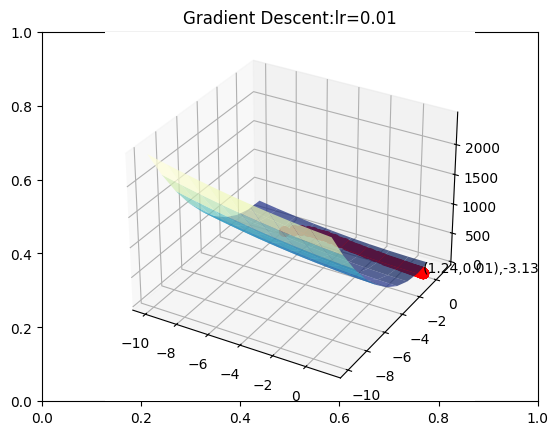

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

student_id = "023xx12345"

student_id = ''.join([i for i in student_id if i.isdigit()])
random.seed(student_id)

# set the number of iterations and learning rate
iters = random.randint(100, 300)
learning_rate = 0.01

# Evaluate the function at x
def C(x):
    return (x.T @ np.array([[2, 1], [1, 20]]) @ x) - (np.array([5, 3]).reshape(2, 1).T @ x)

# Evaluate the gradient of function at x
def dC(x):
    # Compute and return the gradient
    return 2 * np.array([[2, 1], [1, 20]]) @ x - np.array([5, 3]).reshape(2, 1)

def plot_grad_change(X, Y, Z, c, grad_xs0, grad_xs1, grad_ys):
    fig = plt.figure()
    title_str = "Gradient Descent:" + "lr=" + str(learning_rate)
    plt.title(title_str)
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, alpha=0.7)
    for i in range(len(grad_xs0)):
        ax.plot([grad_xs0[i]], [grad_xs1[i]], grad_ys[i][0], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
    ax.text(grad_xs0[-1], grad_xs1[-1], grad_ys[-1][0][0],
            "(" + str(round(grad_xs0[-1], 2)) + "," +
            str(round(grad_xs1[-1], 2)) + ")," +
            str(round(grad_ys[-1][0][0], 2)))
    plt.show()

def GD(start, x, y, z, c, dc, iters, eta):
    px = start.astype(float)
    py = c(px).astype(float)
    print("GD Start Point:", px, py)
    print("Num steps:", iters)
    grad_xs0, grad_xs1, grad_ys = [px[0][0]], [px[1][0]], [py]

    for iter in range(iters):
        # Update px using gradient descent
        px = px - eta * dc(px)
        # Update py
        py = c(px)
        grad_xs0.append(px[0][0])
        grad_xs1.append(px[1][0])
        grad_ys.append(py)
    print("Converged Point:", px, py)
    plot_grad_change(x, y, z, c, grad_xs0, grad_xs1, grad_ys)


lo = -10
hi = 10
x1 = round(random.uniform(lo, 0), 4)
x2 = round(random.uniform(lo, 0), 4)
x = np.linspace(lo, 1, hi)
y = np.linspace(lo, 1, hi)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = C(np.array([X[i][j], Y[i][j]]).reshape(2, 1))
# start Gradient Descent
GD(np.array([x1, x2]).reshape(2, 1), X, Y, Z, C, dC, iters, learning_rate)


GD Start Point: [[-3.8291]
 [-9.8688]] [[2101.51742658]]
Num steps: 161
Converged Point: [[1.235993  ]
 [0.01324126]] [[-3.12809256]]


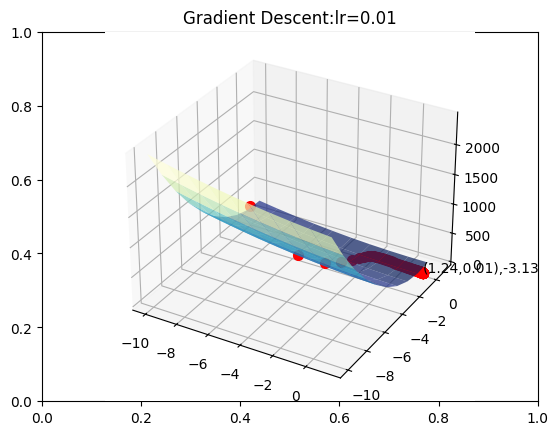

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

#########################
student_id = "2023AA05072"
#########################

student_id = ''.join([i for i in student_id if i.isdigit()])
random.seed(student_id)

# set the number of iterations and learning rate
iters = random.randint(100, 300)
learning_rate = 0.01

#########################
# Evaluate the function at x
def C(x):
    return (x.T @ np.array([[2, 1], [1, 20]]) @ x) - (np.array([5, 3]).reshape(2, 1).T @ x)
#########################

#########################
# Evaluate the gradient of function at x
def dC(x):
    # Compute and return the gradient
    return np.array([4 * x[0] + 2 * x[1] - 5 , 40 * x[1] + 2 * x[0] - 3])
#########################

def plot_grad_change(X, Y, Z, c, grad_xs0, grad_xs1, grad_ys):
    fig = plt.figure()
    title_str = "Gradient Descent:" + "lr=" + str(learning_rate)
    plt.title(title_str)
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, alpha=0.7)
    for i in range(len(grad_xs0)):
        ax.plot([grad_xs0[i]], [grad_xs1[i]], grad_ys[i][0], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
    ax.text(grad_xs0[-1], grad_xs1[-1], grad_ys[-1][0][0],
            "(" + str(round(grad_xs0[-1], 2)) + "," +
            str(round(grad_xs1[-1], 2)) + ")," +
            str(round(grad_ys[-1][0][0], 2)))
    plt.show()

def GD(start, x, y, z, c, dc, iters, eta):
    px = start.astype(float)
    py = c(px).astype(float)
    print("GD Start Point:", px, py)
    print("Num steps:", iters)
    grad_xs0, grad_xs1, grad_ys = [px[0][0]], [px[1][0]], [py]

    for iter in range(iters):
        #########################
        # Update px using gradient descent
        px = px - eta * dc(px)
        # Update py
        py = c(px)
        #########################
        grad_xs0.append(px[0][0])
        grad_xs1.append(px[1][0])
        grad_ys.append(py)
    print("Converged Point:", px, py)
    plot_grad_change(x, y, z, c, grad_xs0, grad_xs1, grad_ys)


lo = -10
hi = 10
x1 = round(random.uniform(lo, 0), 4)
x2 = round(random.uniform(lo, 0), 4)
x = np.linspace(lo, 1, hi)
y = np.linspace(lo, 1, hi)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = C(np.array([X[i][j], Y[i][j]]).reshape(2, 1))
# start Gradient Descent
GD(np.array([x1, x2]).reshape(2, 1), X, Y, Z, C, dC, iters, learning_rate)
